In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from sklearn import preprocessing, svm
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor ,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,LSTM, Normalization
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.optimizers import Adam

In [ ]:
url = '/content/drive/MyDrive/Dataset/Training_capstone_1.csv'
data = pd.read_csv(url)

In [ ]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,nan
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to nan
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [ ]:
data.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
nan                     4920
Length: 134, dtype: int64

In [ ]:
data = data.drop(columns=['nan'])
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
z = data.drop(["prognosis"],axis =1)
a = data['prognosis'].unique()

In [ ]:
# sns.pairplot(data, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

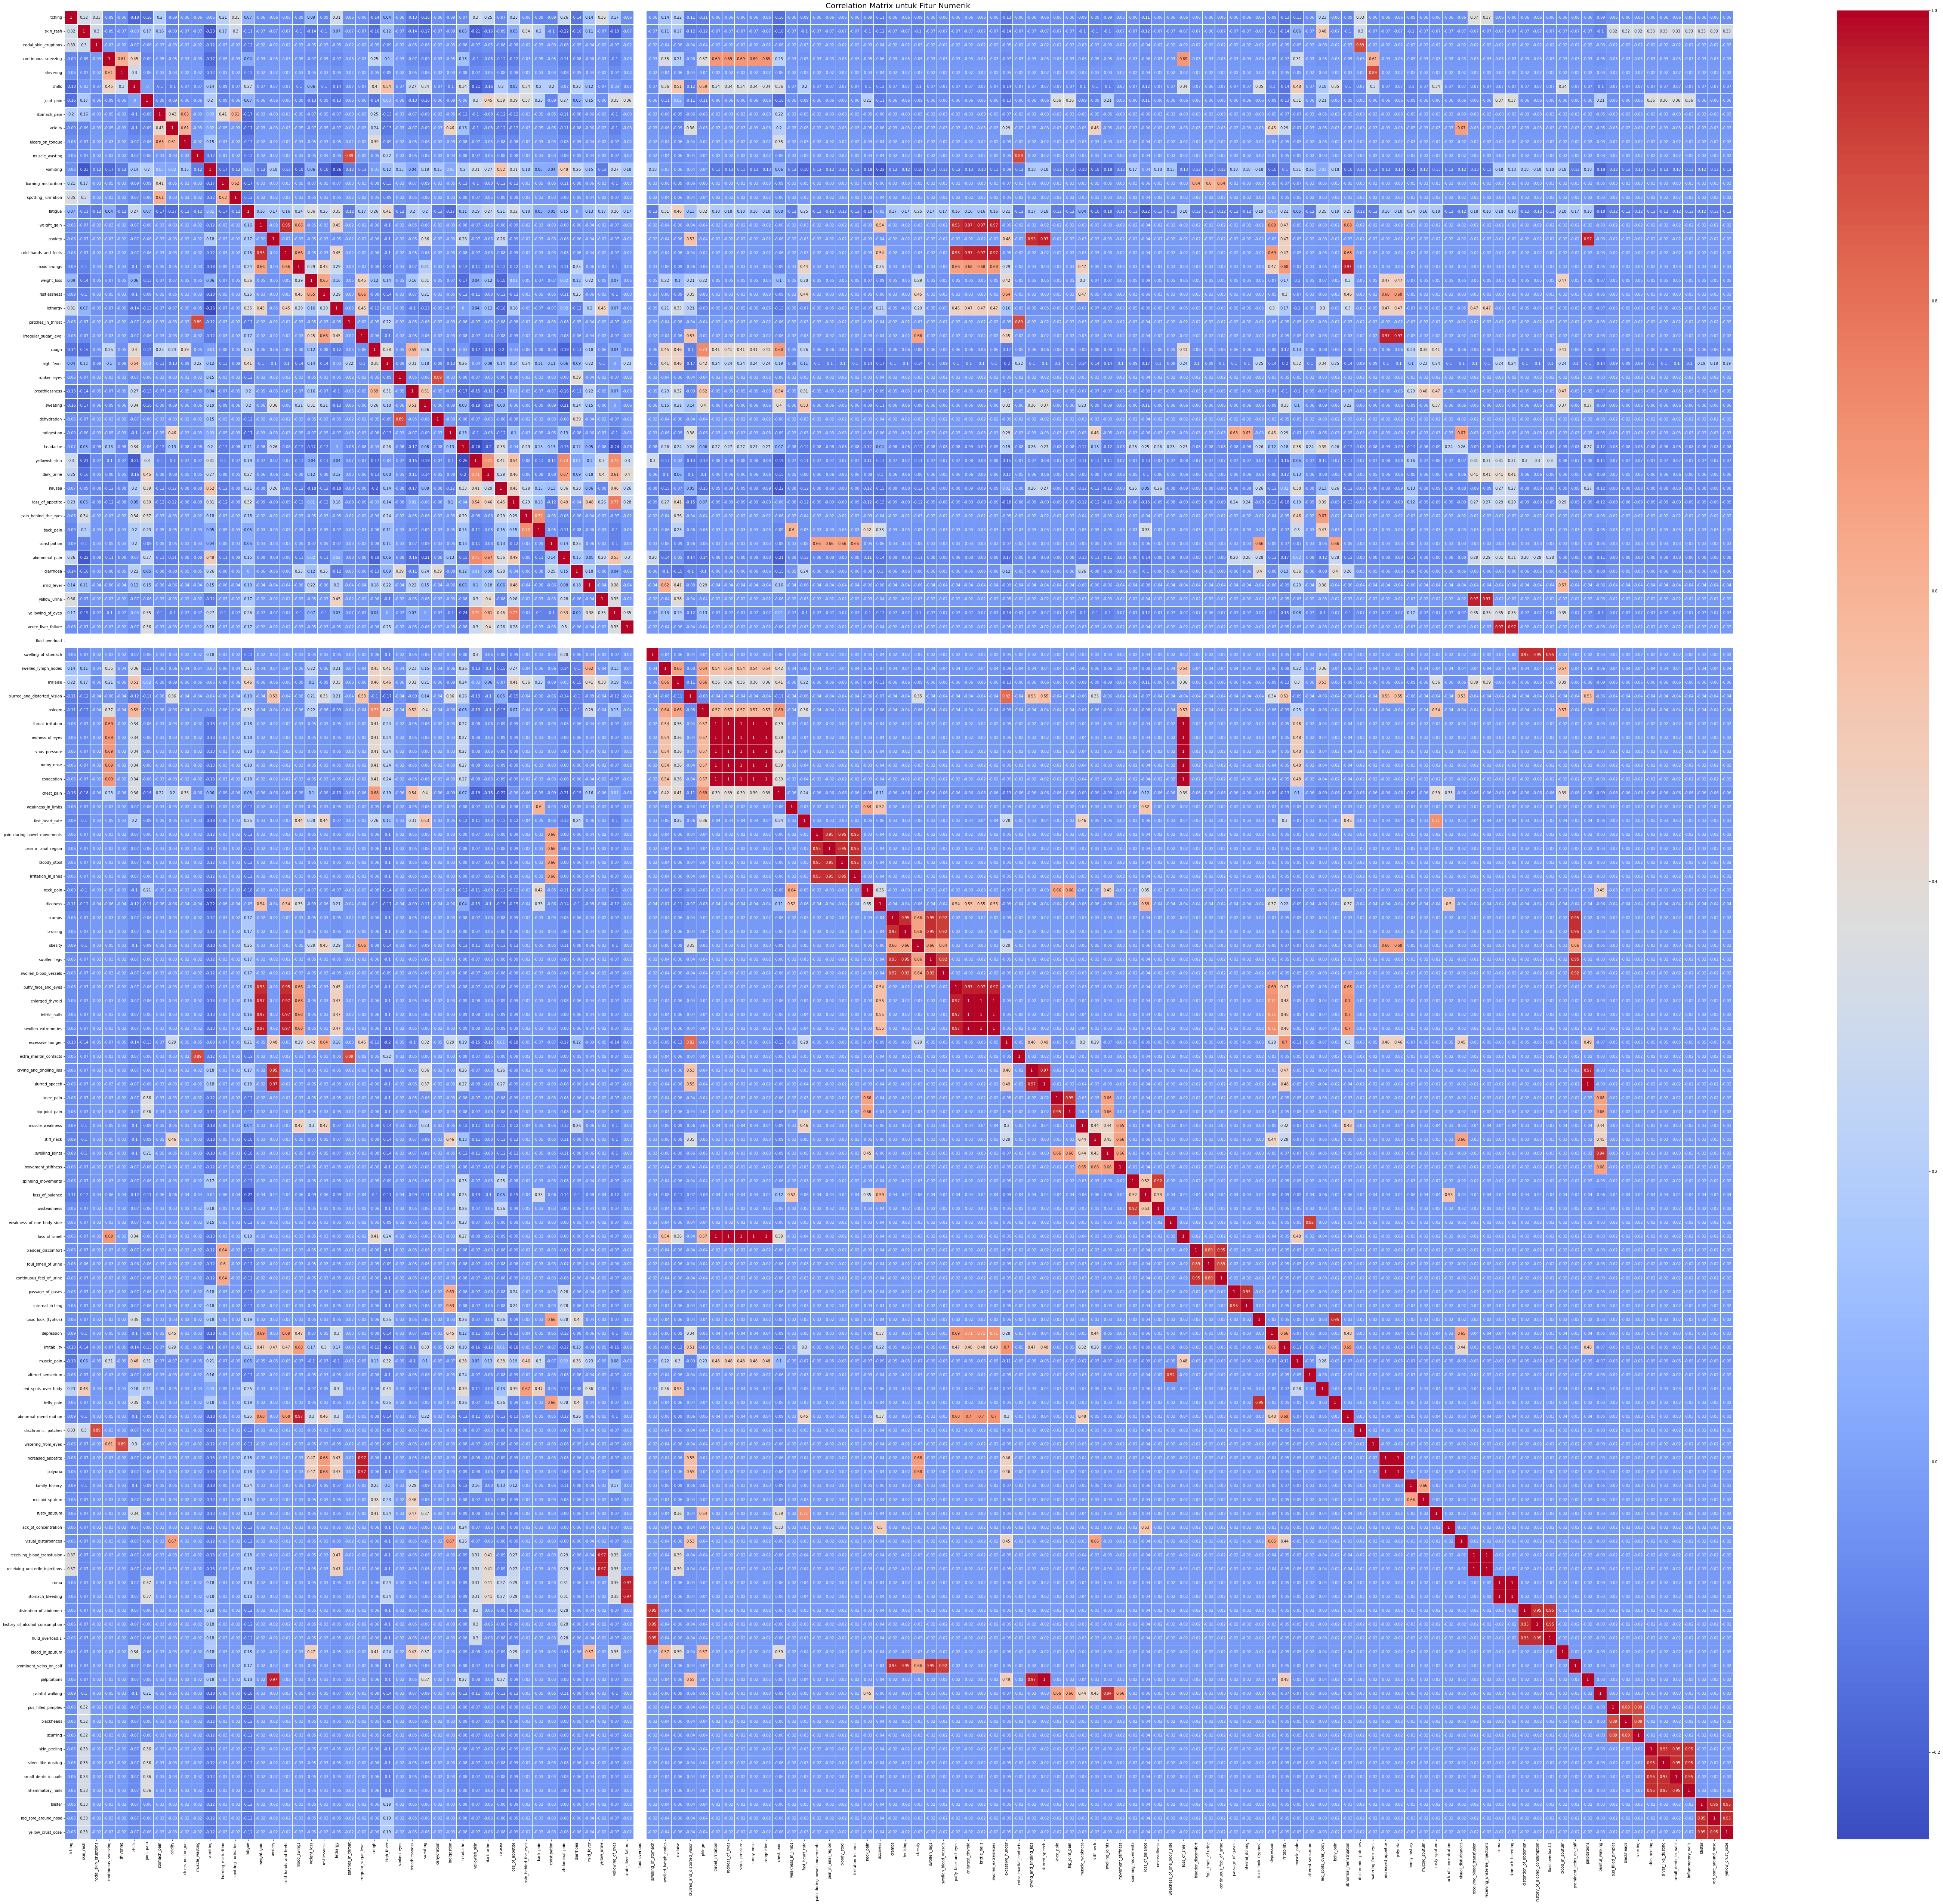

In [ ]:
plt.figure(figsize=(100, 90))
correlation_matrix = data.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [ ]:
category = pd.get_dummies(data.prognosis)
category

,(vertigo) Paroymsal Positional Vertigo,AIDS,Acne,Alcoholic hepatitis,Allergy,Arthritis,Bronchial Asthma,Cervical spondylosis,Chicken pox,Chronic cholestasis,...,Osteoarthristis,Paralysis (brain hemorrhage),Peptic ulcer diseae,Pneumonia,Psoriasis,Tuberculosis,Typhoid,Urinary tract infection,Varicose veins,hepatitis A
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
data = pd.concat([data, category], axis=1)
data = data.drop(columns='prognosis')
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,Osteoarthristis,Paralysis (brain hemorrhage),Peptic ulcer diseae,Pneumonia,Psoriasis,Tuberculosis,Typhoid,Urinary tract infection,Varicose veins,hepatitis A
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_1 = data.values
data_1

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [ ]:
X = data_1[:,0:132]
y = data_1[:,132:173]

In [ ]:
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 1., 1.]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 4920
Total # of sample in train dataset: 4428
Total # of sample in test dataset: 492


In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest'])

In [ ]:
knn = KNeighborsRegressor(n_neighbors=300)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [ ]:
RF = RandomForestRegressor(n_estimators=150, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)   

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF'])
 
model_dict = {'KNN': knn, 'RF': RF}
 
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))
 
mse

,train,test
KNN,0.013174,0.013384
RF,0.008908,0.00972


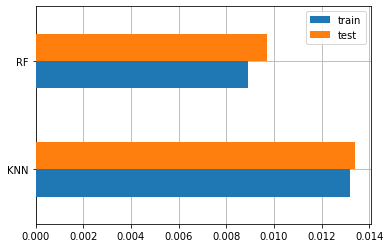

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
prediksi = z.iloc[:1].copy()
prediksi
print(type(z))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
pred_dict = {'y_true':y_test[:1]}
pred_dict
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
y_test = pd.DataFrame(y_test, columns =a)
y_test

,Fungal infection,Allergy,GERD,Chronic cholestasis,Drug Reaction,Peptic ulcer diseae,AIDS,Diabetes,Gastroenteritis,Bronchial Asthma,...,Hypothyroidism,Hyperthyroidism,Hypoglycemia,Osteoarthristis,Arthritis,(vertigo) Paroymsal Positional Vertigo,Acne,Urinary tract infection,Psoriasis,Impetigo
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
prediksi = z.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

Sekuensial Multiclass target

In [ ]:
#Cara 1 Multiclass
tf.random.set_seed(42)
model_s = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128,input_shape=(132,)),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(41,activation ='softmax')
])

In [ ]:
model_s.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
model_s.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               17024     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 41)                2665      
                                                                 
Total params: 27,945
Trainable params: 27,945
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model_s.fit(X_train,y_train, epochs=5000, verbose=1 ,callbacks = [callbacks] )

Epoch 1/5000
139/139 [==============================] - 1s 2ms/step - loss: 1.3706 - accuracy: 0.8805
Epoch 2/5000
124/139 [=========================>....] - ETA: 0s - loss: 0.0379 - accuracy: 1.0000
Akurasi telah mencapai >90%!
139/139 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 1.0000


In [ ]:
model_s.evaluate(X_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.0181 - accuracy: 1.0000


[0.01811201311647892, 1.0]

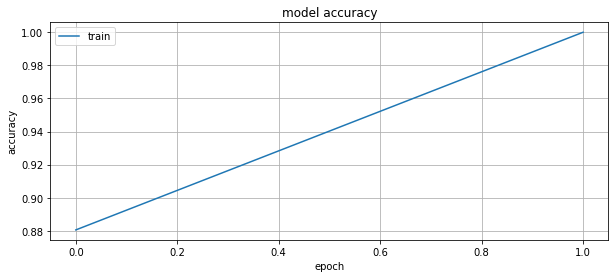

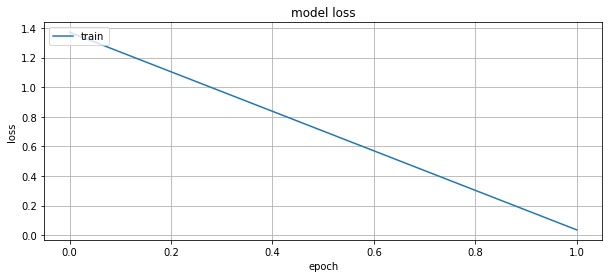

In [ ]:
# Membuat plot akurasi model
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

Sekuensial single target

In [ ]:
X = data.drop(["prognosis"],axis =1)
y = data["prognosis"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [ ]:
tf.random.set_seed(42)
model_s = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128,input_shape=(132,)),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(54, activation='relu'),
      tf.keras.layers.Dense(1,activation ='softmax')
])

In [ ]:
model_s.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
model_s.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               17024     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 54)                3510      
                                                                 
 dense_7 (Dense)             (None, 41)                2255      
                                                                 
Total params: 31,045
Trainable params: 31,045
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model_s.fit(X_train,y_train, epochs=5000, verbose=1 ,callbacks = [callbacks] )

In [ ]:
model_s.evaluate(X_test, y_test)

16/16 [==============================] - 0s 6ms/step - loss: 0.0025 - accuracy: 1.0000


[0.0025494243018329144, 1.0]

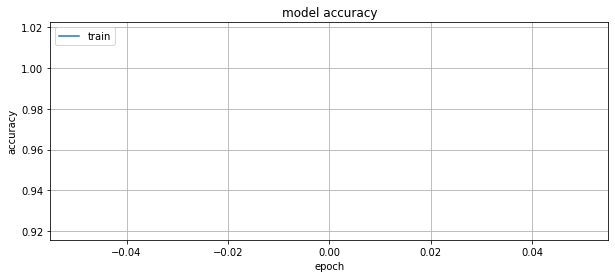

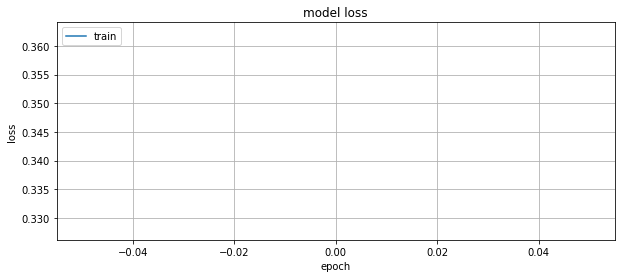

In [ ]:
# Membuat plot akurasi model
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

SVM

In [ ]:
data['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [ ]:
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(X_train, y_train)
prediction_linear = classifier_linear.predict(X_test)

In [ ]:
target_names = data['prognosis'].unique()
print(classification_report(y_test, prediction_linear, target_names=target_names))

                                         precision    recall  f1-score   support

                       Fungal infection       1.00      1.00      1.00        12
                                Allergy       1.00      1.00      1.00        16
                                   GERD       1.00      1.00      1.00        10
                    Chronic cholestasis       1.00      1.00      1.00        13
                          Drug Reaction       1.00      1.00      1.00        11
                    Peptic ulcer diseae       1.00      1.00      1.00        11
                                   AIDS       1.00      1.00      1.00        13
                              Diabetes        1.00      1.00      1.00        13
                        Gastroenteritis       1.00      1.00      1.00        15
                       Bronchial Asthma       1.00      1.00      1.00        16
                          Hypertension        1.00      1.00      1.00        15
                           

Export Model

In [ ]:
# Menyimpan model dalam format SavedModel
export_dir = 'saved_model/'
tf.saved_model.save(model_s, export_dir)

In [ ]:
# Convert SavedModel menjadi vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

import pathlib
tflite_model_file = pathlib.Path('capstone.tflite')
tflite_model_file.write_bytes(tflite_model)

113260